In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import py21cmfast as p21c

#import logging
#logger = logging.getLogger("21cmFAST")
#logger.setLevel(logging.INFO)

random_seed = 1993

EoR_colour = matplotlib.colors.LinearSegmentedColormap.from_list('mycmap',\
             [(0, 'white'),(0.33, 'yellow'),(0.5, 'orange'),(0.68, 'red'),\
              (0.83333, 'black'),(0.9, 'blue'),(1, 'cyan')])
plt.register_cmap(cmap=EoR_colour)

This result was obtained using 21cmFAST at commit 2bb4807c7ef1a41649188a3efc462084f2e3b2e0

# Fiducial and lightcones

Let's fix the initial condition for this tutorial.

In [2]:
output_dir = '/home/yqin/aida/hybrid/mini-halos/'
HII_DIM = 128
BOX_LEN = 250

# USE_FFTW_WISDOM make FFT faster
user_params = {"HII_DIM":HII_DIM, "BOX_LEN": BOX_LEN, "USE_FFTW_WISDOM": True}

initial_conditions = p21c.initial_conditions(user_params=user_params,random_seed=random_seed, direc=output_dir)

Let's run a 'fiducial' model and see its lightcones

Note that the reference model has 

    pow(10, "F_STAR7_MINI") = pow(10, "F_STAR10") / pow(1000,ALPHA_STAR) * 10 # 10 times enhancement
    pow(10, "F_ESC7_MINI" ) = pow(10, "F_ESC10" ) / pow(1000,ALPHA_ESC ) / 10 # 0.1 times enhancement to balance the 10 times enhanced Ngamma
    pow(10, "L_X_MINI"    ) = pow(10, "L_X")
    1 - "F_H2_SHIELD"  = 1

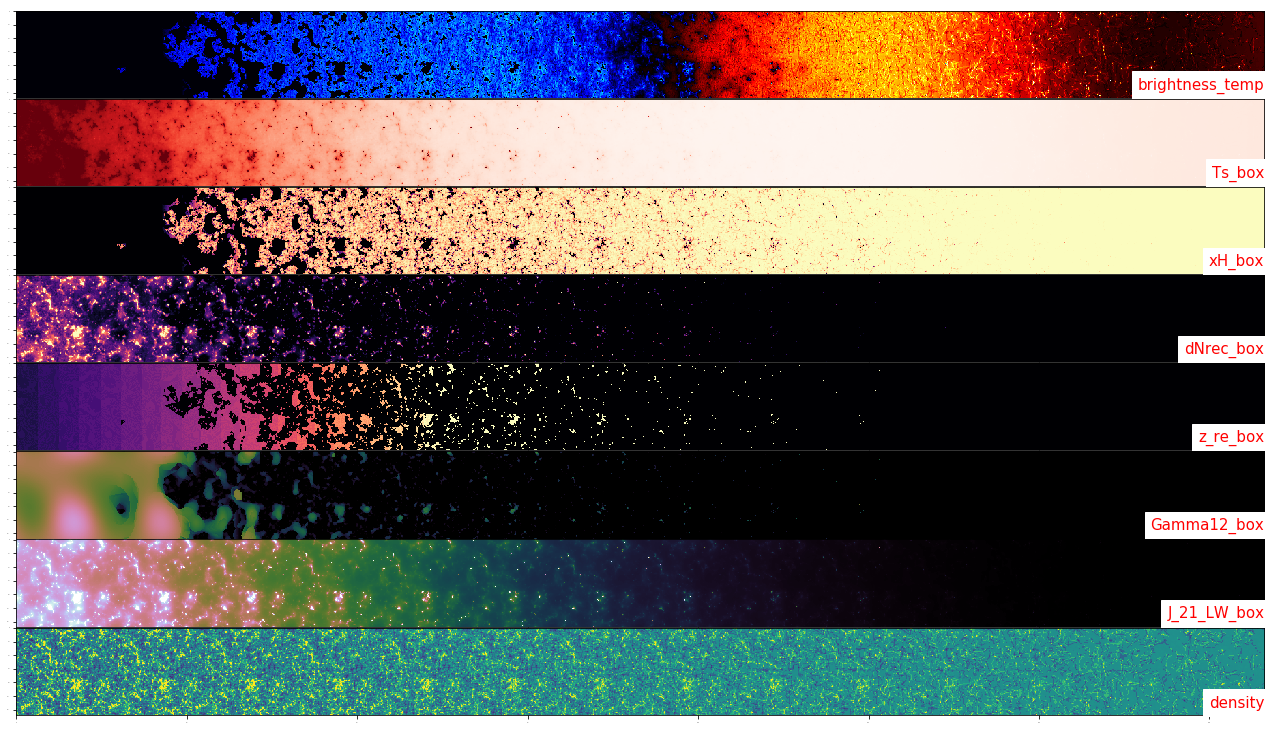

In [3]:
# the lightcones we want to plot later together with their color maps and min/max
lightcone_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
cmaps = [EoR_colour,'Reds','magma','magma','magma','cubehelix','cubehelix','viridis']
vmins = [-150, 1e1, 0, 0, 5, 0, 0, -1]
vmaxs = [  30, 1e3, 1, 2, 9, 1,10,  1]

# set necessary flags for using minihalos and astro parameter
astro_params_fid = {'ALPHA_ESC': 0.0, 'F_ESC10': -1.222, 'F_ESC7_MINI' : -2.222,
                    'ALPHA_STAR': 0.5,'F_STAR10': -1.25, 'F_STAR7_MINI': -1.75,
                    'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 500.0, 'F_H2_SHIELD': 0.0}
flag_options_fid = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True, 'USE_MINI_HALOS':True}

lightcone_fid = p21c.run_lightcone(
        redshift = 5.5,
        init_box = initial_conditions,
        flag_options = flag_options_fid,
        astro_params = astro_params_fid,
        lightcone_quantities=lightcone_quantities,
        global_quantities=lightcone_quantities,
        random_seed = random_seed,
        direc = output_dir
)

fig, axs = plt.subplots(len(lightcone_quantities),1,
            figsize=(getattr(lightcone_fid, lightcone_quantities[0]).shape[2]*0.01,
                     getattr(lightcone_fid, lightcone_quantities[0]).shape[1]*0.01*len(lightcone_quantities)))
for ii, lightcone_quantity in enumerate(lightcone_quantities):
    axs[ii].imshow(getattr(lightcone_fid, lightcone_quantity)[1],
                   vmin=vmins[ii], vmax=vmaxs[ii],cmap=cmaps[ii])
    axs[ii].text(1, 0.05, lightcone_quantity,horizontalalignment='right',verticalalignment='bottom',
            transform=axs[ii].transAxes,color = 'red',backgroundcolor='white',fontsize = 15)
    axs[ii].xaxis.set_tick_params(labelsize=0)
    axs[ii].yaxis.set_tick_params(labelsize=0)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.01)

 # varying parameters

let's vary paremeters that describe mini-halos and see the impact to the global signal

We keep other parameters fixed and vary one of following  by a factor of 0.1, 0.5, 2 and 10:

    pow(10, "F_STAR7_MINI")
    pow(10, "F_ESC7_MINI")
    pow(10, "L_X_MINI")
    1 - "F_H2_SHIELD"
    
We also have a NOmini model where mini-halos are not included

In [8]:
#defining those color, linstyle, blabla
linestyles = ['-', '-',':','-.','-.',':']
colors     = ['gray','black','#e41a1c','#377eb8','#e41a1c','#377eb8']
lws        = [1,3,2,2,2,2]

textss   = ['varying '+r'$f_{*,7}^{\rm mol}$',\
            'varying '+r'$f_{\rm esc}^{\rm mol}$',\
            'varying '+r'$L_{\rm x}^{\rm mol}$',\
            'varying '+r'$1-f_{\rm H_2}^{\rm shield}$']
factorss = [[0, 1, 0.1, 0.5, 2, 10],] * len(textss)
labelss  = [['NOmini', 'reference', 'x0.1', 'x0.5', 'x2', 'x10'],] * len(textss)

Note that I've run these simulations in parallel before this tutorial. With these setup, each took ~6h to finish. Here, running means read the cached outputs.

## global properties

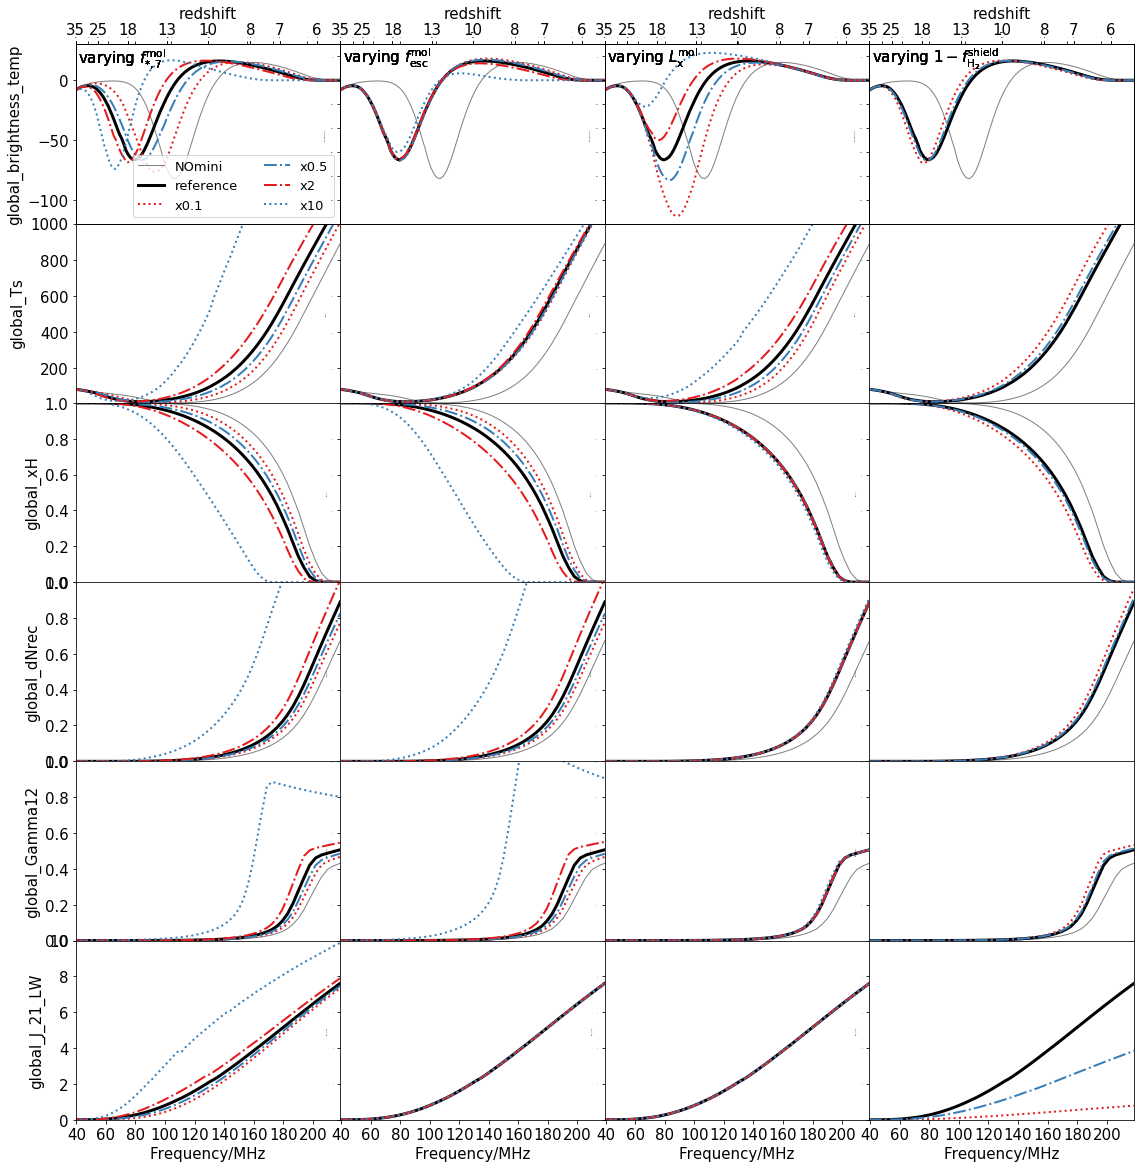

In [86]:
global_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'z_re_box','Gamma12_box','J_21_LW_box',"density")
#choose some to plot...
plot_quantities = ('brightness_temp','Ts_box','xH_box',"dNrec_box",'Gamma12_box','J_21_LW_box')
ymins = [-120, 1e1, 0, 0, 0, 0]
ymaxs = [  30, 1e3, 1, 1, 1,10]

fig, axss = plt.subplots(len(plot_quantities), len(labelss),
                         sharex=True, figsize=(4*len(labelss),2*len(global_quantities)))

for pp, texts in enumerate(textss):
    labels  = labelss[pp]
    factors = factorss[pp] 
    axs     = axss[:,pp]
    for kk, label in enumerate(labels):
        flag_options = flag_options_fid.copy()
        astro_params = astro_params_fid.copy()
        factor = factors[kk]
        if label == 'NOmini':
            flag_options.update({'USE_MINI_HALOS': False})
        else:
            flag_options.update({'USE_MINI_HALOS': True})
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI']+np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI']+np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI']+np.log10(factor)})
            else:
                if factor > 1: continue # can't do negative F_H2_SHIELD
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})
        if label == 'reference':
            lightcone = lightcone_fid
        else:
            lightcone = p21c.run_lightcone(
                redshift = 5.5,
                init_box = initial_conditions,
                flag_options = flag_options,
                astro_params = astro_params,
                global_quantities=global_quantities,
                random_seed = random_seed,
                direc = output_dir
            )

        freqs = 1420.4 / (np.array(lightcone.node_redshifts) + 1.)
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].plot(freqs, getattr(lightcone, 'global_%s'%global_quantity.replace('_box','')),
                         color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
            
    axs[0].text(0.01, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 15)
    for jj, global_quantity in enumerate(plot_quantities):
        axs[jj].set_ylim(ymins[jj], ymaxs[jj])
    axs[-1].set_xlabel('Frequency/MHz',fontsize=15)
    axs[-1].xaxis.set_tick_params(labelsize=15)

    axs[0].set_xlim(1420.4 / (35 + 1.), 1420.4 / (5.5 + 1.))
    zlabels = np.array([ 6,  7,  8,  10, 13, 18, 25, 35])
    ax2 = axs[0].twiny()
    ax2.set_xlim(axs[0].get_xlim())
    ax2.set_xticks(1420.4 / (zlabels + 1.))
    ax2.set_xticklabels(zlabels.astype(np.str)) 
    ax2.set_xlabel("redshift",fontsize=15)
    ax2.xaxis.set_tick_params(labelsize=15)
    ax2.grid(False)
    
    if pp == 0:
        axs[0].legend(loc='lower right', ncol=2,fontsize=13,fancybox=True,frameon=True)
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=15)
            axs[jj].yaxis.set_tick_params(labelsize=15)
    else:
        for jj, global_quantity in enumerate(plot_quantities):
            axs[jj].set_ylabel('global_%s'%global_quantity.replace('_box',''),fontsize=0)
            axs[jj].yaxis.set_tick_params(labelsize=0)

plt.tight_layout()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)

## 21-cm power spectra

In [87]:
# define functions to calculate PS, following py21cmmc
from powerbox.tools import get_power

def compute_power(
   box,
   length,
   n_psbins,
   log_bins=True,
   ignore_kperp_zero=True,
   ignore_kpar_zero=False,
   ignore_k_zero=False,
):
    # Determine the weighting function required from ignoring k's.
    k_weights = np.ones(box.shape, dtype=int)
    n0 = k_weights.shape[0]
    n1 = k_weights.shape[-1]

    if ignore_kperp_zero:
        k_weights[n0 // 2, n0 // 2, :] = 0
    if ignore_kpar_zero:
        k_weights[:, :, n1 // 2] = 0
    if ignore_k_zero:
        k_weights[n0 // 2, n0 // 2, n1 // 2] = 0

    res = get_power(
        box,
        boxlength=length,
        bins=n_psbins,
        bin_ave=False,
        get_variance=False,
        log_bins=log_bins,
        k_weights=k_weights,
    )

    res = list(res)
    k = res[1]
    if log_bins:
        k = np.exp((np.log(k[1:]) + np.log(k[:-1])) / 2)
    else:
        k = (k[1:] + k[:-1]) / 2

    res[1] = k
    return res

def powerspectra(brightness_temp, n_psbins=50, nchunks=10, min_k=0.1, max_k=1.0, logk=True):
    data = []
    chunk_indices = list(range(0,brightness_temp.n_slices,round(brightness_temp.n_slices / nchunks),))

    if len(chunk_indices) > nchunks:
        chunk_indices = chunk_indices[:-1]
    chunk_indices.append(brightness_temp.n_slices)

    for i in range(nchunks):
        start = chunk_indices[i]
        end = chunk_indices[i + 1]
        chunklen = (end - start) * brightness_temp.cell_size

        power, k = compute_power(
            brightness_temp.brightness_temp[:, :, start:end],
            (BOX_LEN, BOX_LEN, chunklen),
            n_psbins,
            log_bins=logk,
        )
        data.append({"k": k, "delta": power * k ** 3 / (2 * np.pi ** 2)})
    return data

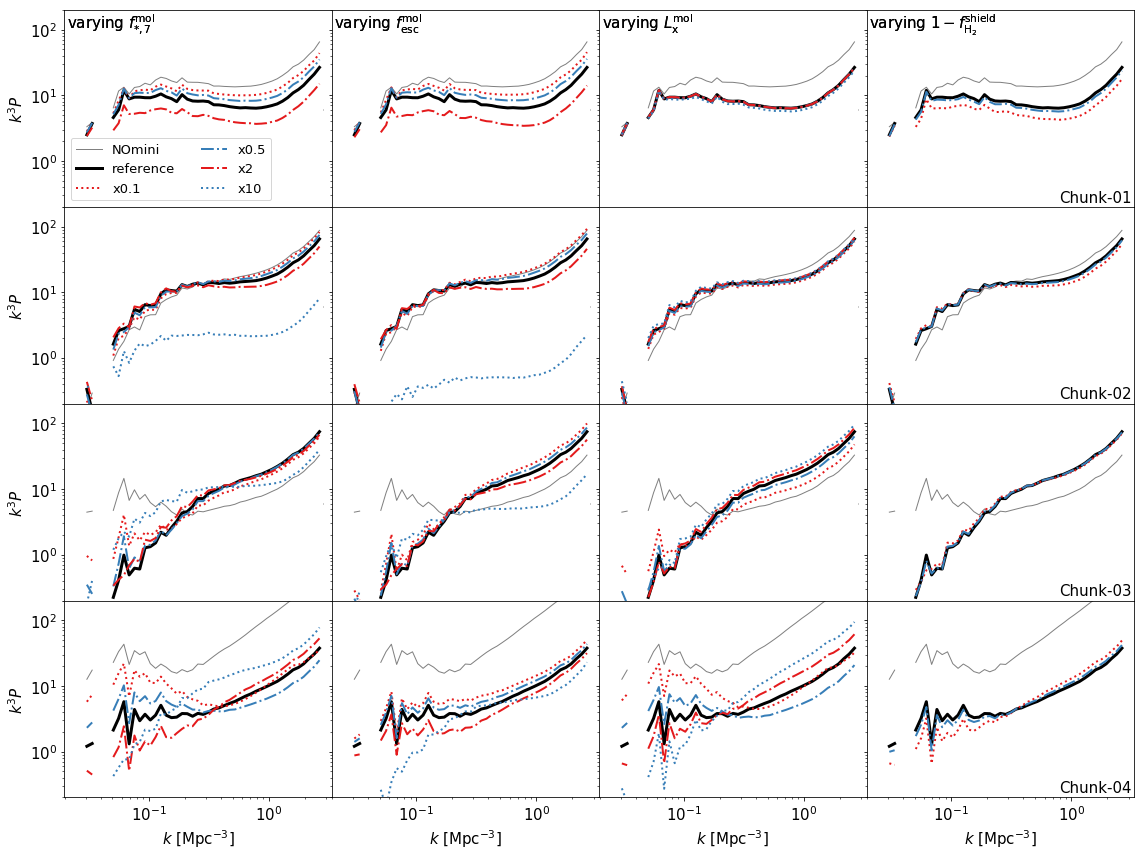

In [96]:
# do 5 chunks but only plot 1 - 4, the 0th has no power for minihalo models where xH=0
nchunks = 4

fig, axss = plt.subplots(nchunks, len(labelss), sharex=True,sharey=True,figsize=(4*len(labelss),3*(nchunks)),subplot_kw={"xscale":'log', "yscale":'log'})

for pp, texts in enumerate(textss):
    labels  = labelss[pp]
    factors = factorss[pp] 
    axs     = axss[:,pp]
    for kk, label in enumerate(labels):
        flag_options = flag_options_fid.copy()
        astro_params = astro_params_fid.copy()
        factor = factors[kk]
        if label == 'NOmini':
            flag_options.update({'USE_MINI_HALOS': False})
        else:
            flag_options.update({'USE_MINI_HALOS': True})
            if pp == 0:
                astro_params.update({'F_STAR7_MINI': astro_params_fid['F_STAR7_MINI']+np.log10(factor)})
            elif pp == 1:
                astro_params.update({'F_ESC7_MINI': astro_params_fid['F_ESC7_MINI']+np.log10(factor)})
            elif pp == 2:
                astro_params.update({'L_X_MINI': astro_params_fid['L_X_MINI']+np.log10(factor)})
            else:
                if factor > 1: continue # can't do negative F_H2_SHIELD
                astro_params.update({'F_H2_SHIELD': 1. - (1. - astro_params_fid['F_H2_SHIELD']) * factor})
        if label == 'reference':
            lightcone = lightcone_fid
        else:
            lightcone = p21c.run_lightcone(
                redshift = 5.5,
                init_box = initial_conditions,
                flag_options = flag_options,
                astro_params = astro_params,
                global_quantities=global_quantities,
                random_seed = random_seed,
                direc = output_dir
            )
        
        PS = powerspectra(lightcone)
        for ii in range(nchunks):
            axs[ii].plot(PS[ii+1]['k'], PS[ii+1]['delta'], color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
        
            if pp == len(textss)-1 and kk == 0:
                axs[ii].text(0.99, 0.01, 'Chunk-%02d'%(ii+1),horizontalalignment='right',verticalalignment='bottom',
                        transform=axs[ii].transAxes,fontsize = 15)
            
    axs[0].text(0.01, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 15)

    axs[-1].set_xlabel("$k$ [Mpc$^{-3}$]",fontsize=15)
    axs[-1].xaxis.set_tick_params(labelsize=15)
    
    if pp == 0:
        for ii in range(nchunks):
            axs[ii].set_ylim(2e-1, 2e2)
            axs[ii].set_ylabel("$k^3 P$", fontsize=15)
            axs[ii].yaxis.set_tick_params(labelsize=15)
    else:
        for ii in range(nchunks-1):
            axs[ii].set_ylim(2e-1, 2e2)
            axs[ii].set_ylabel("$k^3 P$", fontsize=0)
            axs[ii].yaxis.set_tick_params(labelsize=0)

axss[0,0].legend(loc='lower left', ncol=2,fontsize=13,fancybox=True,frameon=True)
plt.tight_layout()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)

 Now you know how minihalo can shape the 21-cm signal!